# Problem Statement:
Pick up the following stocks and generate forecasts accordingly Stocks:
NASDAQ.AAPL
NASDAQ.ADP
NASDAQ.CBOE
NASDAQ.CSCO
NASDAQ.EBAY

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for Time series model
from pandas.tools.plotting import autocorrelation_plot  # for autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

# ARIMA model libraries
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

# for date time conversion
import datetime

import sys

# for interactive potting
import seaborn as sns

# for stats model 
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

#visualization
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
#import dataset
df = pd.read_csv('data_stocks.csv')
# Viewing the first 5 lines
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
#Viewing the last 5 lines
df.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [7]:
#shape of the data
df.shape

(41266, 502)

In [8]:

df['NASDAQ.AAPL'].head()

0    143.6800
1    143.7000
2    143.6901
3    143.6400
4    143.6600
Name: NASDAQ.AAPL, dtype: float64

In [11]:
#datatype of the columns
df.dtypes

DATE              int64
SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
                 ...   
NYSE.USB        float64
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        

In [12]:
#taking log of the column 
df['log_AAPL']=np.log(df['NASDAQ.AAPL'])

In [13]:
df['log_AAPL'].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: log_AAPL, dtype: float64

In [14]:
# import datetime for date time conversion
from datetime import datetime
# datetime conversion and created a new column NDATE
df['NDATE']=pd.to_datetime(df['DATE'],unit='s')

df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,log_AAPL,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


In [15]:
df.shape

(41266, 504)

# 1. NASDAQ.AAPL

In [16]:
#df['new']=df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")

# Durbin_watson test is used to check the presence of Autocorrelation in residuals in regression analysis.
#The Durbin-Watson statistic is always between 0 and 4.
#A value of 2 means that there is no autocorrelation in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.

import statsmodels.api as sm
sm.stats.durbin_watson(df['log_AAPL'])

1.5195875753588083e-08

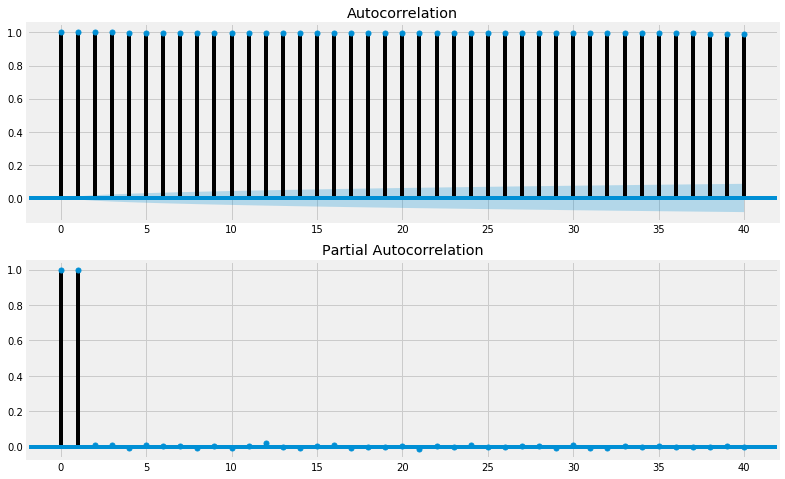

In [19]:

# show plots in the notebook

%matplotlib inline
fig = plt.figure(figsize=(12,8))

# for Auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['log_AAPL'].values.squeeze(), lags=40, ax=ax1)

#for partial Auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['log_AAPL'], lags=40, ax=ax2)

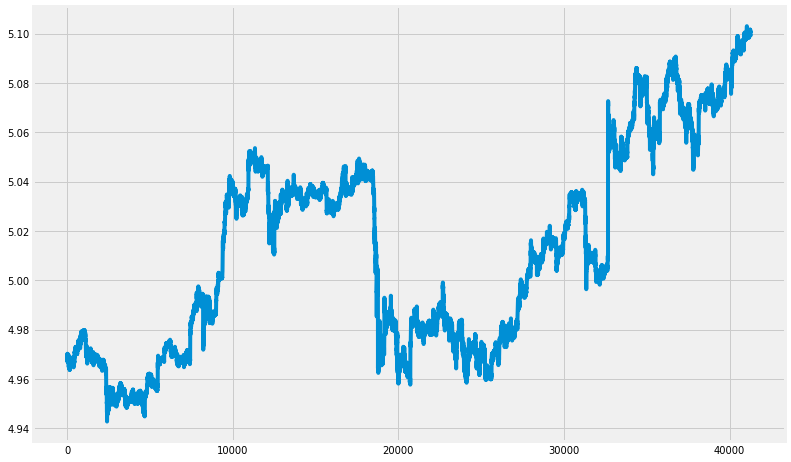

In [22]:
#Line plot of log_AAPL

df['log_AAPL'].plot(figsize=(12,8));

In [23]:
# creating a matrix after dropping nulls
AAPL_array=df["log_AAPL"].dropna().as_matrix()

C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [24]:
# Create ARIMA model

model = ARIMA(AAPL_array, (2,2,1)).fit()
print(model.params)

[-1.46942757e-09 -2.15706756e-02 -2.60067096e-02 -9.68668703e-01]


In [25]:

# printing parameters AIC,BIC and HQIC
print(model.aic,model.bic,model.hqic)

-492060.6927971314 -492017.5540684908 -492047.0581161025


In [26]:
best_values=[0,0,0]

best_values

[0, 0, 0]

In [27]:
best_aic=1e20

In [28]:
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model=ARIMA(AAPL_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass
print(best_values)

C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

[0, 2, 1]


C:\Users\nn\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\nn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
AAPL_pred=model.predict()
AAPL_pred

array([-4.79767842e-09,  1.04034945e-04,  2.55906141e-04, ...,
       -5.39706356e-05,  6.76610544e-04,  7.98129743e-04])

In [31]:
len(AAPL_pred)

41264

In [32]:

from sklearn.metrics import mean_squared_error
print(mean_squared_error(df['log_AAPL'][2:],AAPL_pred))

25.129939953426902


 ## ARIMA model without log transformation

In [33]:
#import dataset
df = pd.read_csv('data_stocks.csv')
# Viewing the first 5 lines
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [35]:

df['new_date']=df['DATE'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

sm.stats.durbin_watson(df['NASDAQ.AAPL'])

3.859214208142229e-07

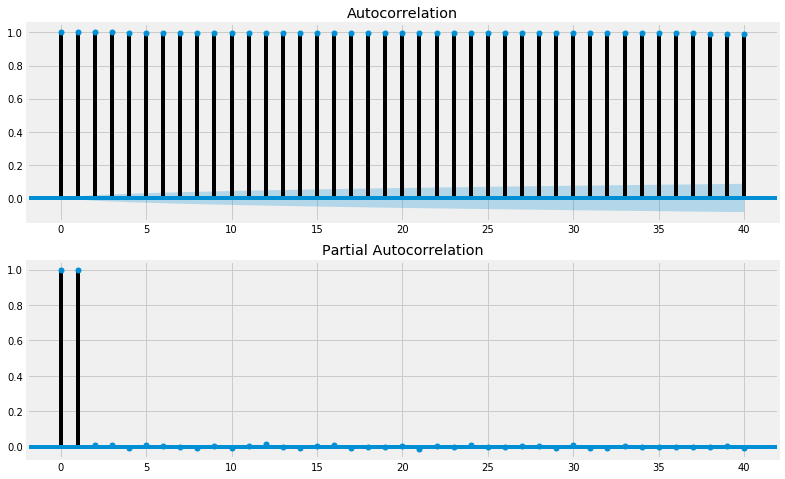

In [36]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))

#auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax1)

# partial auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.AAPL'], lags=40, ax=ax2)

In [37]:
# creating array for ARIMA modelling
AAPL_array=df["NASDAQ.AAPL"].dropna().as_matrix()

# ARIMA model
model_arima = ARIMA(AAPL_array, (2,2,2)).fit()

#printing parameters
print(model_arima.params)

C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[ 1.90735021e-08 -7.57437444e-01 -2.18469632e-02 -2.51177887e-01
 -7.45739512e-01]


In [39]:
# Using ARMA model
model_arma = sm.tsa.ARMA(AAPL_array, (2,2)).fit()
print(model_arma.params)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# Note : Here we get error which is proof that data is not stationary. we can't use ARMA model for non stationary data

In [40]:

# Printing best values for AIC parameters
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model_arima=ARIMA(AAPL_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass

C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\nn\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

In [41]:
best_values

[0, 2, 1]

# using (1,2,1) as parameters for arima model¶



In [43]:

model_arima121 = ARIMA(AAPL_array, (1,2,1)).fit()
print(model_arima121.params)

[ 3.73010016e-08 -1.09190780e-02 -9.99532962e-01]


In [44]:
print(model_arima121.aic,model_arima121.bic,model_arima121.hqic)

-78408.84176601165 -78374.33078309917 -78397.93402118848


In [46]:

prediction=model_arima121.predict()
prediction

array([ 3.73010016e-08,  1.51132948e-02,  3.71807790e-02, ...,
       -8.55387103e-03,  1.12704406e-01,  1.32860848e-01])

In [47]:
len(prediction)

41264

# Analyzing the residuals

In [51]:
from scipy import stats


resid = model_arima121.resid
#stats.normaltest(model_arima121)
resid

array([-0.02990004, -0.05531329,  0.03291922, ..., -0.11144613,
       -0.13270441,  0.09713915])

In [52]:
## becuase I changed the dataframe to array it thorws an error

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


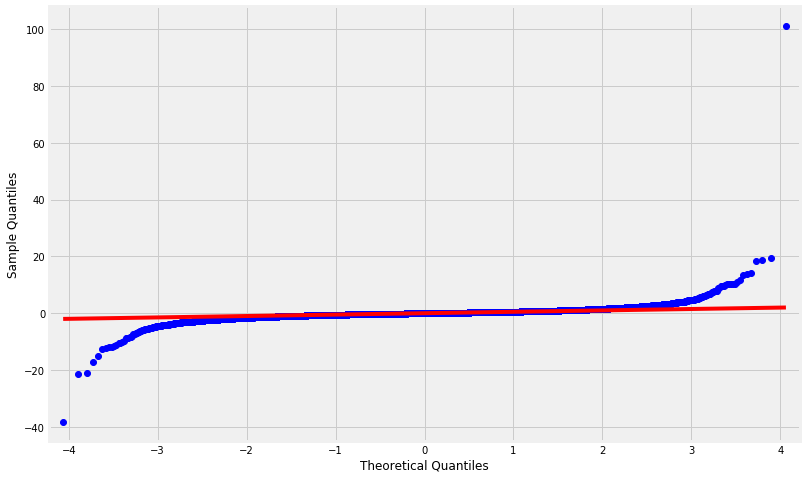

In [53]:
from statsmodels.graphics.api import qqplot
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

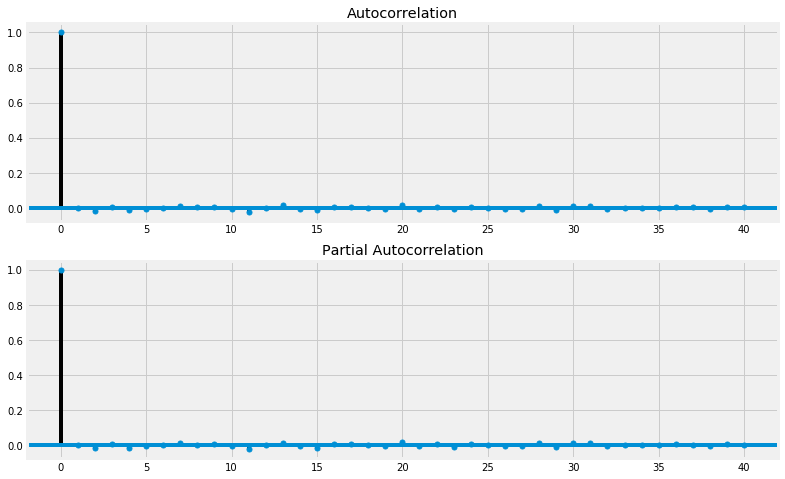

In [54]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=40, ax=ax1) #### resid.values.sqeeze() throws an error
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [55]:
# create a function to calculate MFE and MAE


def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [56]:
#print("MFE = ", mean_forecast_err(AAPL_array[2:], prediction))
#print("MAE = ", mean_absolute_err(AAPL_array[2:], prediction))

 ## 2.NASDAQ.ADP

In [57]:
ADP=df['NASDAQ.ADP']

In [64]:
ADP.dtype

dtype('float64')

In [65]:
df.isnull().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX  

In [67]:

# convert pandas column into matrix to use in ARIMA model
ADP_array=df["NASDAQ.ADP"].dropna().as_matrix()



C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
#ARIMA model
model_ADP = ARIMA(ADP_array, (2,2,1)).fit()

In [69]:
#When i passes 2 as q it shows invertibility error value error

pred_adp=model_ADP.predict()

In [70]:
print(model_ADP.aic,model_ADP.bic,model_ADP.hqic)

-97460.95977550939 -97417.82104686878 -97447.32509448043


In [71]:
# We see all the above three model metrics are almost equal.
pred_adp

array([ 8.47259279e-08, -7.48688875e-02,  3.49577093e-02, ...,
       -2.12247645e-02,  6.60713629e-02,  1.15249213e-01])

In [72]:
#df2.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

df2=df.copy()

df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 19:04:00


In [73]:
df2.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250,2017-09-01 01:26:00
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100,2017-09-01 01:27:00
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850,2017-09-01 01:28:00
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301,2017-09-01 01:29:00
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800,2017-09-01 01:30:00


In [74]:
df2 = pd.read_csv('data_stocks.csv')

df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [75]:
df2['new_d']=df2['DATE'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

df2.index

RangeIndex(start=0, stop=41266, step=1)

# 3.NASDAQ.CBOE

In [76]:
#log transformation
df['log_CBoE']=np.log(df['NASDAQ.CBOE'])

# creating matrix
CBoE_array=df["log_CBoE"].dropna().as_matrix()

# residuals
df['diff_log_CBoE']= df["log_CBoE"]-df["log_CBoE"].shift(periods=-1)

#Building model
model_CBoE = ARIMA(CBoE_array, (2,2,1)).fit()

# prediction
predCBoE=model_CBoE.predict()

C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\nn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\nn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


In [77]:
print(model_CBoE.aic)
print(model_CBoE.bic)

-506313.84439545235
-506270.70566681173


In [78]:

predCBoE=model_CBoE.predict()

In [79]:
rmse_CBoE=np.sqrt(mean_squared_error(df['diff_log_CBoE'][1:-1],predCBoE))
rmse_CBoE

0.000797197639425843

In [80]:
np.exp(rmse_CBoE)

1.0007975154859206

# 5. NASDAQ.EBAY

In [82]:
df['log_EBAY']=np.log(df['NASDAQ.EBAY'])
Ebay_array=df["log_EBAY"].dropna().as_matrix()
df['diff_log_EBAY']= df["log_EBAY"]-df["log_EBAY"].shift(periods=-1)
model_Ebay = ARIMA(Ebay_array, (2,2,1)).fit()
predEbay=model_Ebay.predict()

C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [83]:
df[df['diff_log_EBAY'].isnull()==True]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date,log_CBoE,diff_log_CBoE,log_EBAY,diff_log_EBAY
41265,1504209600,2471.49,44.74,163.98,155.16,83.69,106.47,114.46,47.15,142.41,...,32.27,62.07,76.81,114.28,62.68,2017-09-01 01:30:00,4.614031,NaN,3.587124,NaN


In [86]:
rmse_ebay=np.sqrt(mean_squared_error(df['diff_log_EBAY'][1:-1],predEbay))

In [87]:
rmse_ebay

0.0009745452721053422

In [88]:
np.exp(rmse_ebay)

1.000975020295647

# 4. NASDAQ.CSCO

In [91]:
from sklearn.metrics import mean_squared_error

df2['CSCO_log']=np.log(df2['NASDAQ.CSCO'])
CSCO_array=df2['CSCO_log'].dropna().as_matrix()

df2['diff_CSCO_log']= df2['CSCO_log']-df2["CSCO_log"].shift(periods=-1) #Here periods=-1 is used beacuse current row is subtracted from next row 

model_CSCO = ARIMA(CSCO_array, (2,2,1)).fit()
df2['diff_CSCO_log'].shape

C:\Users\nn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


(41266,)

In [94]:
rmse=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],model_CSCO.predict()))
rmse

0.0009163582680695098

In [95]:
model_CSCO.aic

-486449.6977627953

In [96]:
pred_CSCO=model_CSCO.predict()

In [97]:
pred_CSCO

array([-6.59133084e-10,  1.69687255e-03,  2.54435476e-03, ...,
       -5.11271198e-04, -5.14916803e-05,  1.12670050e-04])

In [98]:
rmse_CSCO=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],pred_CSCO))

In [99]:
np.exp(rmse_CSCO)

1.000916778252583